# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
import csv
import random
import cv2
import tensorflow as tf
from sklearn.utils import shuffle

In [2]:
%matplotlib inline

In [3]:
# TODO: Fill this in based on where you saved the training and testing data
training_file = '../data/train.p'
validation_file= '../data/valid.p'
testing_file = '../data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [4]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


In [5]:
id_to_sign_names = dict()

with open('signnames.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    id_to_sign_names = {int(row[0]):row[1] for row in reader}
    csvfile.close()

In [6]:
id_to_sign_names

{0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vehicles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Vehicles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go st

In [7]:
def draw_hist(dataset, label, num_classes):
    hist, bins = np.histogram(dataset, bins=num_classes)
    width = 0.8 * (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    plt.bar(center, hist, align='center', width=width)
    plt.xlabel(label)
    plt.ylabel("Count")
    plt.show()

Looking at histogram below, the number of examples per class seems to be skewed<br>
Like few classes have less than 250 training examples amd few have around 2000<br>

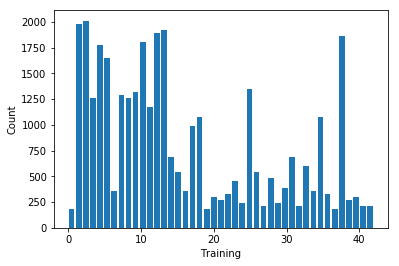

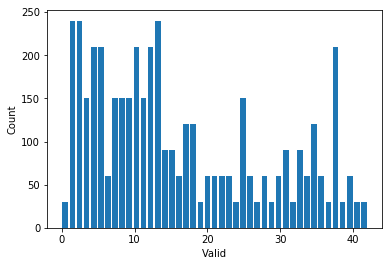

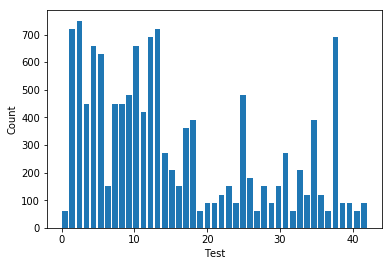

In [8]:
draw_hist(y_train, "Training", n_classes)
draw_hist(y_valid, "Valid", n_classes)
draw_hist(y_test, "Test", n_classes)

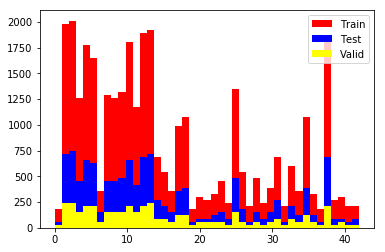

In [9]:
hist, bins = np.histogram(y_train, bins=n_classes)
plt.hist(y_train, bins, color='red', label='Train')
plt.hist(y_test, bins, color='blue', label='Test')
plt.hist(y_valid, bins, color='yellow', label='Valid')
plt.legend(loc='upper right')
plt.show()

### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [10]:
def display(img, label, cmap=''):
    plt.figure(figsize=(2,2))
    plt.title(id_to_sign_names[label])
    if cmap != '':
        plt.imshow(image, cmap=cmap)
    else:
        plt.imshow(image)

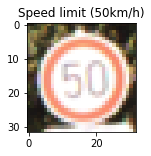

In [11]:
index = random.randint(0, len(X_train))
image = X_train[index].squeeze()
label = y_train[index]
display(image, label)

In [12]:
def display_mult(img_list, label_list, pred_list=[], columns=4, rows=5, cmap=''):        
    fig = plt.figure(figsize=(16,16));
    for i in range(1, columns*rows +1):
        fig.add_subplot(rows, columns, i)       
        img = img_list[i-1]
        title =''
        if len(pred_list) > 0 :
            title = 'A:' + str(id_to_sign_names[label_list[i-1]])
            title += '\n/P:' + str(id_to_sign_names[pred_list[i-1]])
        else:
            title = id_to_sign_names[label_list[i-1]]
        plt.title(title)
        plt.axis('off')
        if cmap != '':
            plt.imshow(img, cmap=cmap)
        else:
            plt.imshow(img)
    plt.show()

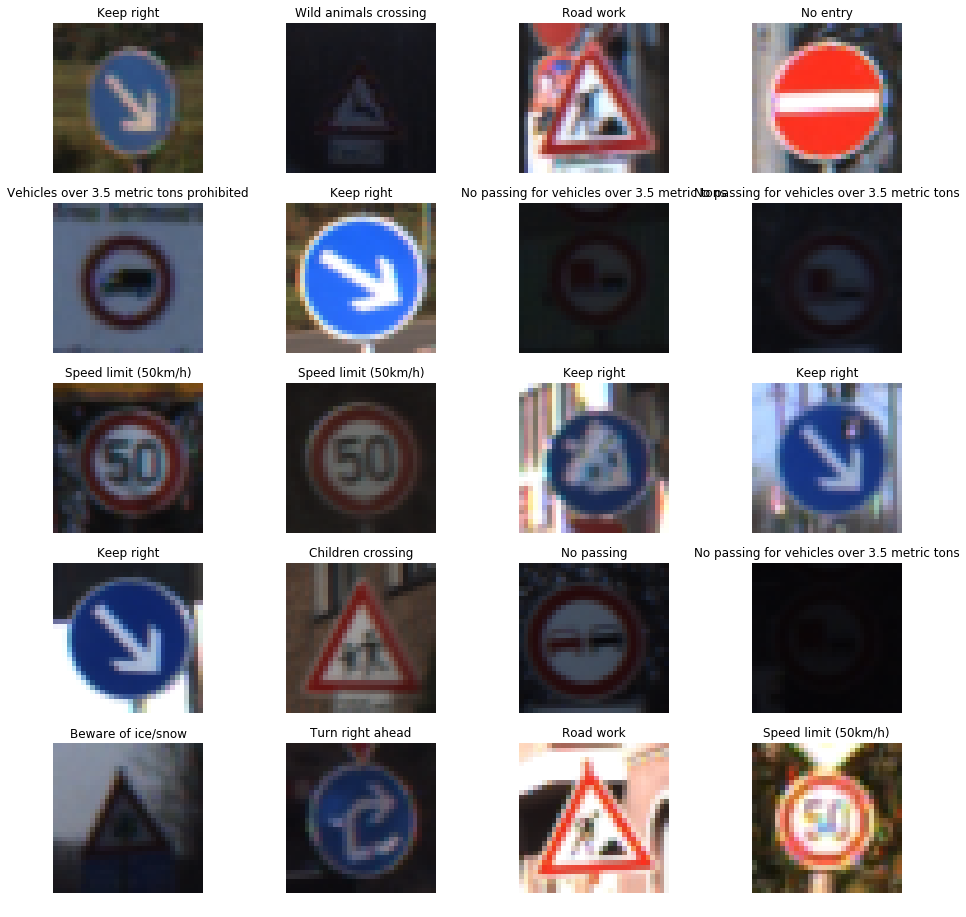

In [13]:
image_list = list()
label_list = list()
for i in range(20):
    indx = random.randint(0, len(X_train))
    image_list.append(X_train[indx])
    label_list.append(y_train[indx])

display_mult(image_list, label_list)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

# Gray Scale



Here I converted the graphs into grayscale as the rgb pixels are useless when classifying pics.<br>

In [14]:
def gray_scale(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Normalize the image



Here I approximately normalize the data.<br>

In [15]:
def normalize(img):
    return ((img - np.mean(img))/ np.std(img))

# Equalize histogram

In [16]:
def equalize(img):
    return cv2.equalizeHist(img)

# CLAHE histogram



Global Equalization considers global contrasts. But its not good idea everytime.
CLAHE histogram uses adaptive histogram equalization. It divides the image into smaller tiles
and applies equalization on those tiles. Notice that these tiles are small (8x8 pixel by default)
and if these tiles contain noise, applying equalization will increase noise, so contrast limiting
is also applied. After equalization, to remove artifacts in tile borders, bilinear interpolation is applied<br>

In [17]:
def clahe(img):
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    return clahe.apply(img)

In [18]:
def preprocess(imgs, labels):
    gray_imgs = list(map(gray_scale, imgs))
    eq_imgs = list(map(clahe, gray_imgs))
    preprocessed_imgs = list(map(normalize, eq_imgs))
    x_images, x_labels = shuffle(preprocessed_imgs, labels)
    return x_images, x_labels

In [19]:
X_train_preprocessed, y_train_preprocessed = preprocess(X_train, y_train)
X_valid, y_valid = preprocess(X_valid, y_valid)
X_test, y_test = preprocess(X_test, y_test)

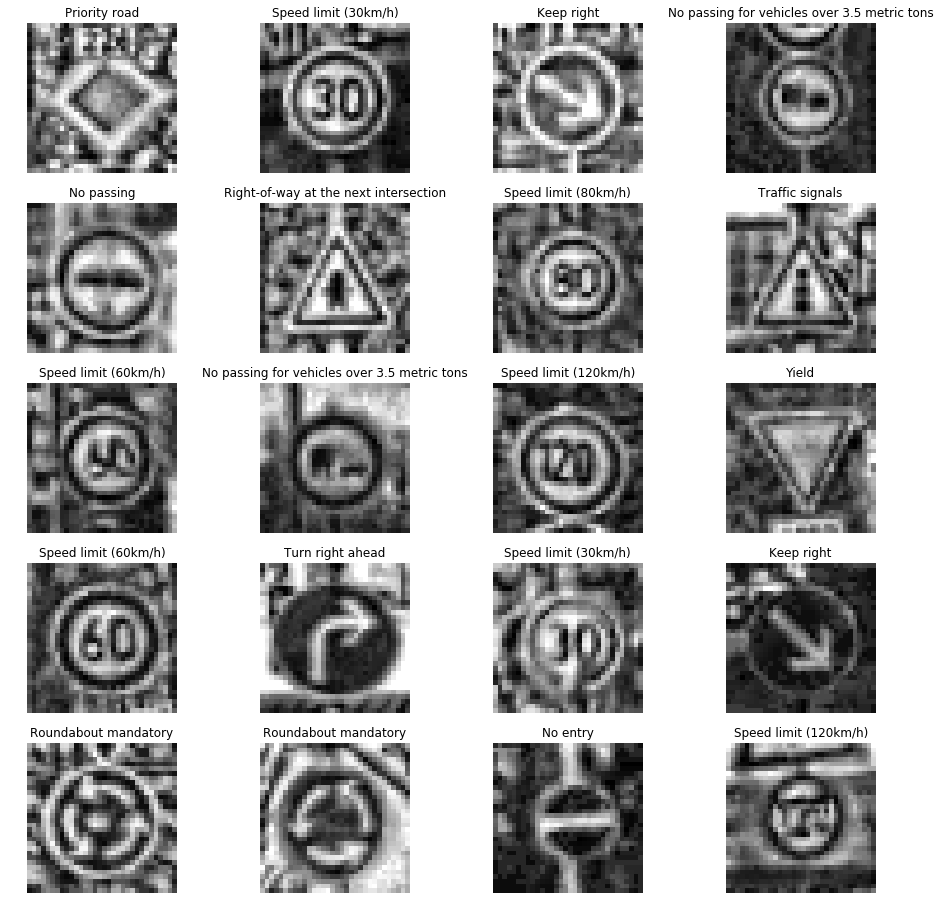

In [20]:
image_list = list()
label_list = list()
for i in range(20):
    indx = random.randint(0, len(X_train_preprocessed))
    image_list.append(X_train_preprocessed[indx])
    label_list.append(y_train_preprocessed[indx])

display_mult(image_list, label_list, cmap='gray')

### Model Architecture

First we try with standard LeNet architecture which when trained for <br>
epochs = 50 , lr = 1e-3 and batch size = 128 , it self reached  more than 93% accuracy <br>
Only change we made is pre-processing, use of Xavier initializer and use dropout<br>

# Xavier Initialization

Basically draws values from Guassian distribution where mean = 0 and variance = 1/ (number of input neurons to layer). (http://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf) <br>
Essentially we want variance to remain in particular range through each passing layer to avoid vanishing or exploding the signal.<br>
Use of Xavier initialization was one of the tricks mentioned in bag of tricks paper by team from AWS (https://arxiv.org/abs/1812.01187) <br>

In [21]:
initializer = tf.contrib.layers.xavier_initializer()

# Comparison between 2 models

![Model Comparison](model1.jpg)

In [22]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
from tensorflow.contrib.layers import flatten

def LeNet(x, use_dropout=False):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    #mu = 0
    #sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv_w1 = tf.Variable(initializer(shape=(5, 5, 1, 6)))
    conv_b1 = tf.Variable(tf.zeros(6))
    conv_1 = tf.nn.conv2d(x, conv_w1, strides=[1,1,1,1], padding='VALID') + conv_b1

    # Activation.
    conv_1 = tf.nn.relu(conv_1)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv_1 = tf.nn.max_pool(conv_1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')
    if use_dropout:
        conv_1 = tf.nn.dropout(conv_1, keep_prob)

    # Layer 2: Convolutional. Output = 10x10x16.
    conv_w2 = tf.Variable(initializer(shape=(5, 5, 6, 16)))
    conv_b2 = tf.Variable(tf.zeros(16))
    conv_2 = tf.nn.conv2d(conv_1, conv_w2, strides=[1,1,1,1], padding='VALID') + conv_b2
    
    # Activation.
    conv_2 = tf.nn.relu(conv_2)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv_2 = tf.nn.max_pool(conv_2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')
    if use_dropout:
        conv_2 = tf.nn.dropout(conv_2, keep_prob)

    # Flatten. Input = 5x5x16. Output = 400.
    fc0 = flatten(conv_2)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_w = tf.Variable(initializer(shape=(400, 120)))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1 = tf.add(tf.matmul(fc0, fc1_w), fc1_b)
    
    # Activation.
    fc1 = tf.nn.relu(fc1)
    if use_dropout:
        fc1 = tf.nn.dropout(fc1, keep_prob)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_w = tf.Variable(initializer(shape=(120, 84)))
    fc2_b = tf.Variable(tf.zeros(84))
    fc2 = tf.add(tf.matmul(fc1, fc2_w), fc2_b)
    
    # Activation.
    fc2 = tf.nn.relu(fc2)
    if use_dropout:
        fc2 = tf.nn.dropout(fc2, keep_prob)

    # Layer 5: Fully Connected. Input = 84. Output = n_classes.
    fc3_W  = tf.Variable(initializer(shape=(84, n_classes)))
    fc3_b  = tf.Variable(tf.zeros(n_classes))
    logits = tf.add(tf.matmul(fc2, fc3_W), fc3_b)
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [23]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
EPOCHS = 50
BATCH_SIZE = 128
rate = 1e-3

In [24]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)
keep_prob = tf.placeholder(tf.float32)

We use Adam optimizer and cross entropy loss. <br>
I tried using SGD with momentum=0.9 to obtain similar validation and test accuracy <br>
Although Its removed from this submission<br>

In [25]:
logits = LeNet(x, True)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [26]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

In [27]:
def evaluate(X_data, y_data, prob=0):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        if prob > 0:
            accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:prob})
            loss = sess.run(loss_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:prob})
        else:
            accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
            loss = sess.run(loss_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples, loss

In [28]:
global best_acc
best_acc= 0

In [29]:
train_accs = []
valid_accs = []
train_losses = []
valid_losses = []

In [30]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    print("Training...")
    print()
    train_loss = 0.0
    train_acc = 0.0
    for i in range(EPOCHS):
        for offset in range(0, n_train, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_preprocessed[offset:end], y_train_preprocessed[offset:end]
            batch_x = np.reshape(batch_x, (-1, 32, 32, 1))
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:0.8})
            train_loss = sess.run(loss_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:0.8})
            train_acc = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:0.8})
            
        train_accs.append(train_acc)
        train_losses.append(train_loss)
        X_valid_reshaped = np.reshape(X_valid, (-1, 32, 32, 1))
        validation_accuracy, validation_loss = evaluate(X_valid_reshaped, y_valid, prob=1.0)
        valid_accs.append(validation_accuracy)
        valid_losses.append(validation_loss)
        if validation_accuracy > best_acc:
            best_acc = validation_accuracy
            saver.save(sess, './lenet')
            print("Model saved")
        
        print("EPOCH {} ...".format(i+1))
        print("Training Loss: {:.4f}, Training Accuracy = {:.3f}".format(train_loss, train_acc * 100))
        print("Validation Loss: {:.4f}, Validation Accuracy = {:.3f}".format(validation_loss, validation_accuracy*100))
        print()

Training...

Model saved
EPOCH 1 ...
Training Loss: 0.7977, Training Accuracy = 73.874
Validation Loss: 0.6733, Validation Accuracy = 80.000

Model saved
EPOCH 2 ...
Training Loss: 0.4448, Training Accuracy = 81.081
Validation Loss: 0.2532, Validation Accuracy = 91.429

Model saved
EPOCH 3 ...
Training Loss: 0.4048, Training Accuracy = 85.586
Validation Loss: 0.1854, Validation Accuracy = 94.082

Model saved
EPOCH 4 ...
Training Loss: 0.3278, Training Accuracy = 89.189
Validation Loss: 0.1213, Validation Accuracy = 94.535

Model saved
EPOCH 5 ...
Training Loss: 0.2988, Training Accuracy = 90.991
Validation Loss: 0.1154, Validation Accuracy = 95.215

Model saved
EPOCH 6 ...
Training Loss: 0.2650, Training Accuracy = 95.495
Validation Loss: 0.0841, Validation Accuracy = 96.009

EPOCH 7 ...
Training Loss: 0.2338, Training Accuracy = 93.694
Validation Loss: 0.0817, Validation Accuracy = 95.896

Model saved
EPOCH 8 ...
Training Loss: 0.2000, Training Accuracy = 92.793
Validation Loss: 0.056

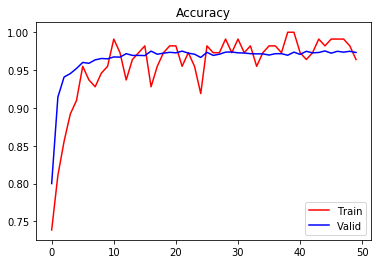

In [31]:
plt.plot(train_accs, color='red', label='Train')
plt.plot(valid_accs, color='blue', label='Valid')
plt.title('Accuracy')
plt.legend(loc='best')
plt.show()

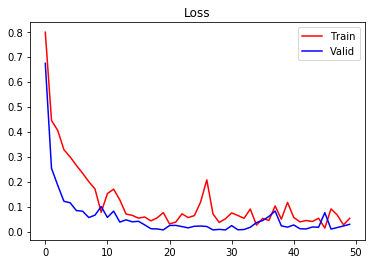

In [32]:
plt.plot(train_losses, color='red', label='Train')
plt.plot(valid_losses, color='blue', label='Valid')
plt.title('Loss')
plt.legend(loc='best')
plt.show()

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Analyze Performance

In [33]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_reshaped = np.reshape(X_test, (-1, 32, 32, 1))
    test_accuracy, test_loss = evaluate(test_reshaped, y_test, 1.0)
    print("Test Loss = {:.4f}, Test Accuracy = {:.3f}".format(test_loss, test_accuracy * 100))

INFO:tensorflow:Restoring parameters from ./lenet
Test Loss = 0.0559, Test Accuracy = 96.152


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

### Predict the Sign Type for Each Image

In [34]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
def predict(test_x, top_k=1):
    num_examples = len(test_x)
    y_pred = np.zeros((num_examples, top_k), dtype=np.int32)
    y_prob = np.zeros((num_examples, top_k))
    top_5 = tf.nn.top_k(tf.nn.softmax(logits), k=top_k, sorted=True)
    with tf.Session() as sess:
        saver.restore(sess, './lenet')
        y_prob, y_pred = sess.run(top_5, feed_dict={x:test_x, keep_prob:1.0})
    return y_prob, y_pred

In [35]:
import os
list_of_imgs = []
test_dir = 'test/'
for image_name in os.listdir(test_dir):
    image = str(test_dir) + str(image_name)
    img = cv2.imread(image)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    print(img.shape)
    list_of_imgs.append(img)

(696, 726, 3)
(746, 1038, 3)
(534, 570, 3)
(822, 844, 3)
(758, 1014, 3)


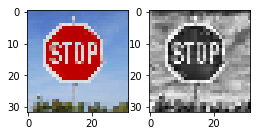

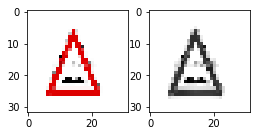

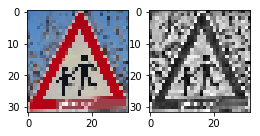

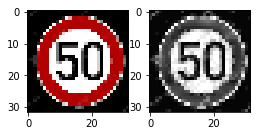

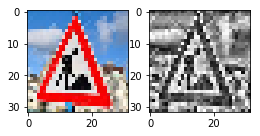

In [36]:
for img in list_of_imgs:
    resized_image = cv2.resize(img, (32, 32))
    processed_img = normalize(clahe(gray_scale(resized_image)))
    fg, ax = plt.subplots(nrows=1, ncols=2, figsize=(4,4))
    ax[0].imshow(resized_image)
    ax[1].imshow(processed_img, cmap='gray')

In [37]:
list_of_labels = []
list_of_preds = []
list_of_probs = []
for img in list_of_imgs:
    resized_image = cv2.resize(img, (32, 32), interpolation=cv2.INTER_NEAREST)
    processed_img = normalize(equalize(gray_scale(resized_image)))
    reshaped_img = np.reshape(processed_img, (-1, 32, 32, 1))
    probs, preds = predict(reshaped_img, 5)
    print(np.ndarray.flatten(preds))
    print(np.ndarray.flatten(probs))
    list_of_preds.append(np.ndarray.flatten(preds))
    labels = []
    for pred in np.ndarray.flatten(preds):
        labels.append(id_to_sign_names[pred])
    list_of_labels.append(labels)
    list_of_probs.append(np.ndarray.flatten(probs))

INFO:tensorflow:Restoring parameters from ./lenet
[12 40 13 11 28]
[ 0.73990691  0.16416526  0.03198316  0.02202372  0.00482315]
INFO:tensorflow:Restoring parameters from ./lenet
[23 31 21 29 22]
[ 0.75477326  0.13341554  0.03034977  0.02453371  0.01780603]
INFO:tensorflow:Restoring parameters from ./lenet
[28 29 24 22 30]
[  9.99870181e-01   9.82991260e-05   2.52025820e-05   2.02018964e-06
   1.81776761e-06]
INFO:tensorflow:Restoring parameters from ./lenet
[2 1 5 3 8]
[  9.99841809e-01   1.32892004e-04   2.45097926e-05   6.65179869e-07
   5.01227859e-08]
INFO:tensorflow:Restoring parameters from ./lenet
[25 22 28 26 29]
[  9.99480546e-01   1.93226399e-04   1.00254292e-04   8.43608432e-05
   6.19094208e-05]


In [38]:
actual_labels = np.array([14, 13, 28, 33, 2])

In [39]:
list_of_labels

[['Priority road',
  'Roundabout mandatory',
  'Yield',
  'Right-of-way at the next intersection',
  'Children crossing'],
 ['Slippery road',
  'Wild animals crossing',
  'Double curve',
  'Bicycles crossing',
  'Bumpy road'],
 ['Children crossing',
  'Bicycles crossing',
  'Road narrows on the right',
  'Bumpy road',
  'Beware of ice/snow'],
 ['Speed limit (50km/h)',
  'Speed limit (30km/h)',
  'Speed limit (80km/h)',
  'Speed limit (60km/h)',
  'Speed limit (120km/h)'],
 ['Road work',
  'Bumpy road',
  'Children crossing',
  'Traffic signals',
  'Bicycles crossing']]

In [40]:
list_of_probs

[array([ 0.73990691,  0.16416526,  0.03198316,  0.02202372,  0.00482315], dtype=float32),
 array([ 0.75477326,  0.13341554,  0.03034977,  0.02453371,  0.01780603], dtype=float32),
 array([  9.99870181e-01,   9.82991260e-05,   2.52025820e-05,
          2.02018964e-06,   1.81776761e-06], dtype=float32),
 array([  9.99841809e-01,   1.32892004e-04,   2.45097926e-05,
          6.65179869e-07,   5.01227859e-08], dtype=float32),
 array([  9.99480546e-01,   1.93226399e-04,   1.00254292e-04,
          8.43608432e-05,   6.19094208e-05], dtype=float32)]

In [41]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
def show_imgs_softmax_probs(imgs, lb_names, probs, fig_size=(20, 10)):
    rows = len(imgs)
    fg, ax = plt.subplots(nrows=rows, ncols=2, figsize=fig_size)
    for i, prob_lb in enumerate(lb_names):
        img = imgs[i]
        ax[i,0].imshow(img)

        y_pos = np.arange(len(prob_lb))
        for j in range(0, len(prob_lb)):
            if j == 0:
                color = 'green'
            else:
                color = 'red'
            ax[i, 1].barh(j, probs[i][j], color=color, label="{0}".format(prob_lb[j]))

        ax[i, 1].set_yticks(y_pos)
        ax[i, 1].set_yticklabels(prob_lb)
        ax[i, 1].invert_yaxis()
        ax[i, 1].set_xlabel('Class')
        ax[i, 1].set_title('Softmax')  
        ax[i, 1].set_xscale('log')
    
    fg.tight_layout()
    plt.show()

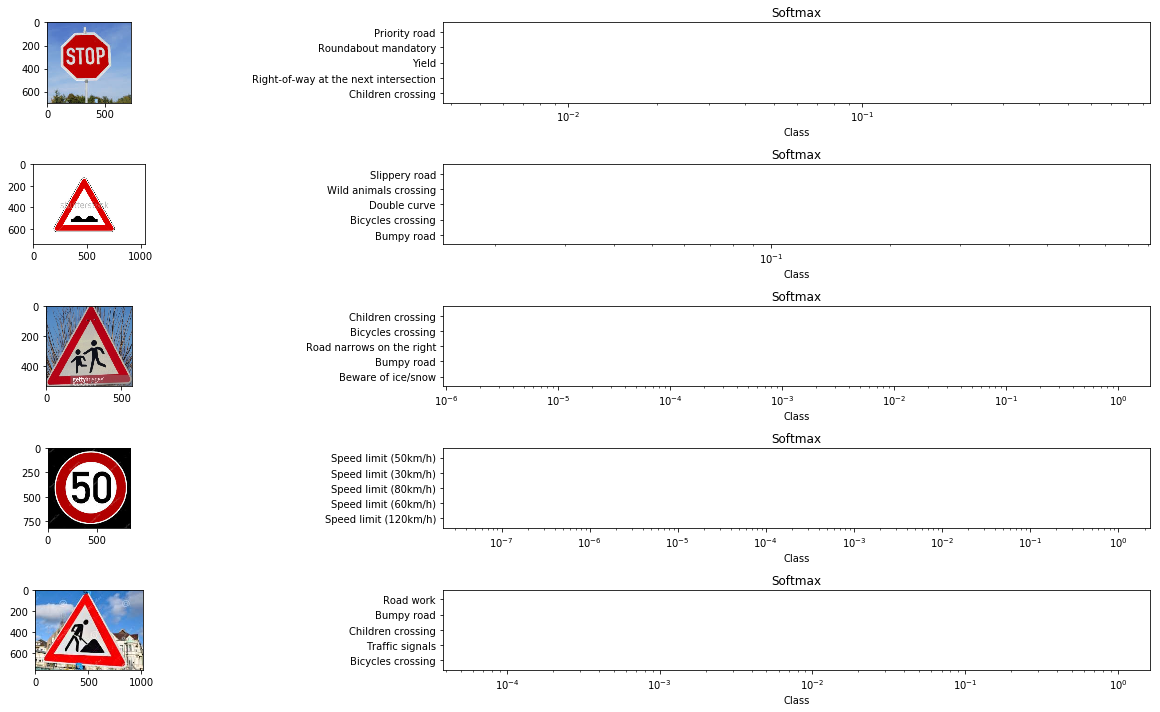

In [42]:
show_imgs_softmax_probs(list_of_imgs, list_of_labels, list_of_probs)

In [43]:
my_preds = np.array(list_of_preds)
my_preds

array([[12, 40, 13, 11, 28],
       [23, 31, 21, 29, 22],
       [28, 29, 24, 22, 30],
       [ 2,  1,  5,  3,  8],
       [25, 22, 28, 26, 29]], dtype=int32)

In [44]:
acc = 0.0
nos = len(actual_labels)
for i, pred in enumerate(my_preds):
    if actual_labels[i] in pred:
        acc += 1
        
top5_acc = acc / nos * 100
top5_acc

20.0

In [45]:
acc = 0.0
nos = len(actual_labels)
for i, pred in enumerate(my_preds):
    if actual_labels[i] == pred[0]:
        acc += 1
        
top1_acc = acc / nos * 100
top1_acc

20.0

# Testing on images downloaded from web

I downloaded 5 images from web and used trained letnet model to predict top 5 outputs for each image The accuracy of the model is 80%. It successfully clssify the first 4 pics. This is most probably because the training images are well centered and cropped, while in this image the sign is far away from the lens and have other things in background. One of the thing that can fix this is more augmentation. Specifically like rotating images , random crops etc <br>



### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.